In [1]:
import subprocess
import sys
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# 列出所有需要的套件
required_packages = [
    "numpy", 
    "pandas", 
    "scikit-learn", 
    "matplotlib", 

]

# 檢查並安裝每個缺失的套件
for package in required_packages:
    try:
        __import__(package)
    except ImportError:
        install(package)

# Kmean

* 1️ 產生模擬資料（3 個群）

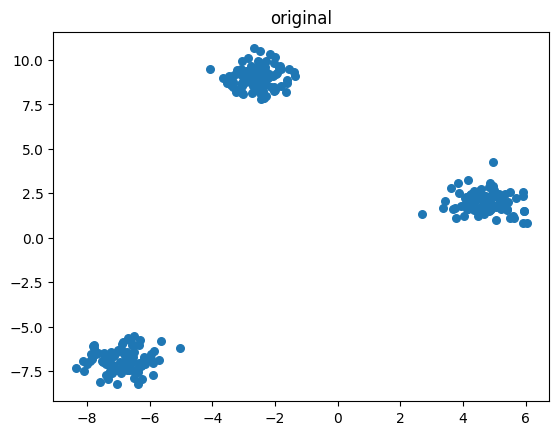

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 產生模擬的分群資料
# n_samples=300：總共產生 300 筆資料點
# centers=3：分成 3 個群中心（即3個聚類）
# cluster_std=0.6：每個群的標準差（控制點的分布範圍，越小越集中）
# random_state=42：設定亂數種子，使每次執行結果一致（方便重現）
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)
#X一個 shape 為 (300, 2) 的 NumPy 陣列，表示 300 筆資料，每筆資料在平面上有兩個座標（x, y）
#y_true對應的「群標籤」（也就是每筆資料實際屬於哪一個群，0～2）

# 可視化原始資料（未經分群，只看原始資料的散佈情形）
# X[:, 0] :取出所有列,0表示資料的第一個特徵（x軸座標）
# X[:, 1] 表示資料的第二個特徵（y軸座標）
# s=30 表示點的大小為30
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("original")
plt.show()


c:\Users\AN515\.pyenv\pyenv-win\versions\3.8.5\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


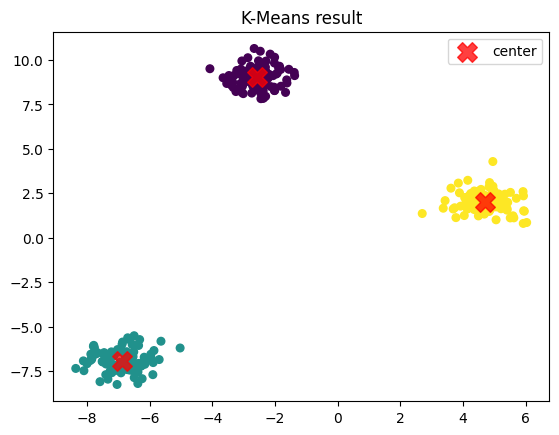

In [ ]:

# 2️ 建立 KMeans 模型,設定要分成 3 群，並指定亂數種子（為了結果可重現）
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X) # 對資料 X 進行 KMeans 訓練，找出每群的中心點（centroids）


# 3️ 取得分群結果與中心點
y_kmeans = kmeans.predict(X) 
# 使用模型預測每筆資料所屬的群，回傳的結果是 0、1、2 對應三個群
centers = kmeans.cluster_centers_
# 取得三個分群的中心點座標，形狀為 (3, 2)，3個中心點各有 2 維（x 和 y）

# 4️ 可視化分群結果
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
# 畫出所有資料點
# X[:, 0] 和 X[:, 1] 分別是 x 軸與 y 軸座標
# c=y_kmeans 表示依分群結果上色
# s=30 是點的大小
# cmap='viridis' 使用漸層色彩來顯示不同群
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='center')
# 畫出中心點（centroids）
# centers[:, 0] 和 centers[:, 1] 是中心點的 x 和 y 座標
# c='red'：使用紅色標示中心
# s=200：點的大小較大以突顯
# alpha=0.75：稍微透明
# marker='X'：使用 X 符號
# label='center'：加上圖例名稱
plt.title("K-Means result")
plt.legend()
plt.show()


* 2️ 建立 KMeans 模型

In [2]:
# 1）生成範例資料；若已有資料，可改為載入自己的 X
X, _ = make_blobs(n_samples=300, centers=8, cluster_std=0.8, random_state=42)

MovieWriter imagemagick unavailable; using Pillow instead.


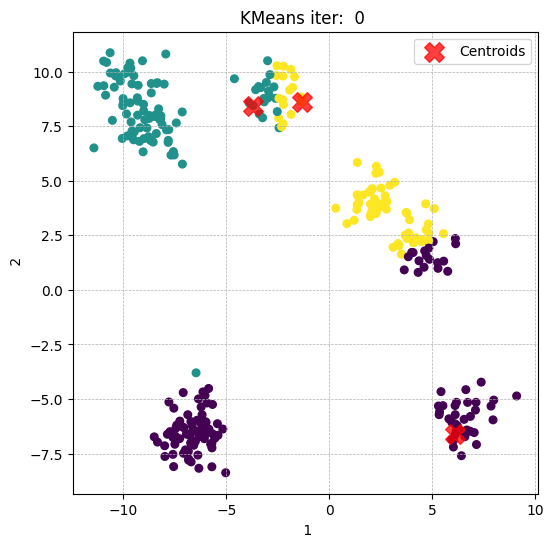

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_blobs

# 自訂 KMeans，記錄每次迭代的中心點歷程

def kmeans_with_history(X, k, max_iters=100, tol=1e-4, random_state=42):
    rng = np.random.RandomState(random_state)
    # 隨機選 k 個初始中心
    centers = X[rng.choice(len(X), k, replace=False)]
    history = [centers.copy()]

    for i in range(max_iters):
        # 分配：每個點指派給距離最近的中心
        labels = np.argmin(cdist(X, centers), axis=1)
        # 更新：計算每個群的新中心
        new_centers = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        history.append(new_centers.copy())

        # 若中心點位移小於容差，則停止
        if np.all(np.linalg.norm(new_centers - centers, axis=1) < tol):
            break
        centers = new_centers

    return history, labels


if __name__ == '__main__':


    # 2）執行 KMeans 並記錄歷程
    k = 3
    history, _ = kmeans_with_history(X, k=k, max_iters=50)

    # 3）建立動畫
    fig, ax = plt.subplots(figsize=(6, 6))

    def update(frame):
        ax.clear()
        centers = history[frame]
        labels = np.argmin(cdist(X, centers), axis=1)

        # 繪製資料點
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis')
        # 繪製中心點
        ax.scatter(centers[:, 0], centers[:, 1], s=200, alpha=0.75,
                   marker='X', c='red', label='Centroids')
        ax.set_title(f"KMeans iter:  {frame} ")
        ax.legend(loc='upper right')
        ax.set_xlabel(' 1')
        ax.set_ylabel(' 2')
        ax.grid(True, linestyle='--', linewidth=0.5)

    ani = FuncAnimation(fig, update, frames=len(history), interval=800, repeat=False)

    # 若要將動畫儲存為 GIF ，可取消以下註解：
    ani.save('kmeans_animation.gif', writer='imagemagick', fps=2)



MovieWriter imagemagick unavailable; using Pillow instead.


Done


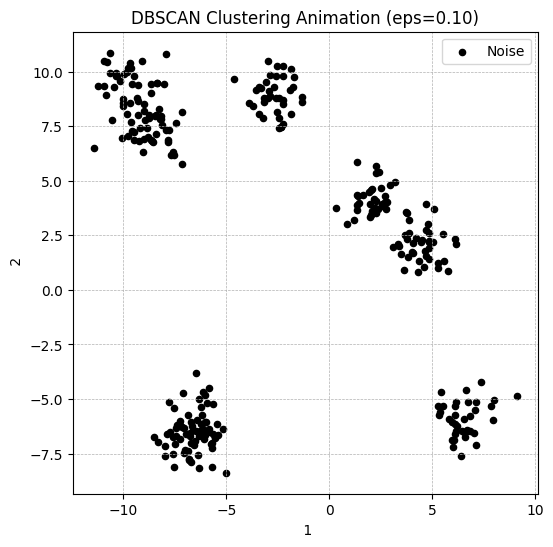

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# 設定一系列 eps 值，並定義 min_samples
eps_values = np.linspace(0.1, 1.5, 30)
# 產生從 0.1 到 1.5 間的 30 個 eps 值，用於 DBSCAN 的參數測試

min_samples = 5
# DBSCAN 中「最小樣本數」參數，表示核心點至少需要的鄰近點數

# 對每個 eps 執行 DBSCAN，並記錄標籤
histories = [] # 用來記錄每個 eps 對應的分群結果（標籤）
for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=min_samples)
    # 建立 DBSCAN 模型，設定當前的 eps 和固定的 min_samples
    labels = db.fit_predict(X)
    # 對資料 X 執行分群，並取得標籤（-1 表示噪音點，其餘為群編號）
    histories.append((eps, labels))
    # 將 eps 和對應的標籤結果存入 histories 清單中

# 建立動畫
fig, ax = plt.subplots(figsize=(6, 6))# 建立圖形與子圖物件，設定圖形大小為 6x6 吋

def update(frame):
    ax.clear()# 每一幀都先清除畫面
    eps, labels = histories[frame] # 取得當前幀所對應的 eps 值與分群標籤
    unique_labels = set(labels)  # 找出目前幀中所有獨特的群編號（包括噪音點 -1）
    for lbl in unique_labels:
        mask = (labels == lbl) # 建立布林遮罩，篩選出屬於該群的資料點
        if lbl == -1:
            ax.scatter(X[mask, 0], X[mask, 1], c='black', s=20, label='Noise') # 噪音點以黑色顯示
        else:
            ax.scatter(X[mask, 0], X[mask, 1], s=50, label=f'Cluster {lbl}') # 其他群以預設顏色顯示
    ax.set_title(f'DBSCAN Clustering Animation (eps={eps:.2f})')
    ax.set_xlabel(' 1')
    ax.set_ylabel(' 2')
    ax.legend(loc='upper right')
    ax.grid(True, linestyle='--', linewidth=0.5)

ani = FuncAnimation(fig, update, frames=len(histories), interval=800, repeat=False)
# fig：對應的圖形
# update：每一幀執行的函數
# frames=len(histories)：總幀數與歷史紀錄數相同（每個 eps 一幀）
# interval=800：每幀顯示時間為 800 毫秒
# repeat=False：動畫結束後不重播

# 如需儲存為 GIF 或 MP4，可取消以下註解：
ani.save('dbscan_animation.gif', writer='imagemagick', fps=2)
print("Done")


# 線性擬和

* 讀取資料

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#Pandas是用於資料操縱和分析的Python軟體庫。它建造在NumPy基礎上，並為操縱數值表格和時間序列，提供了資料結構和運算操作。
#Scikit-learn（曾叫做scikits.learn與sklearn）是用於Python程式語言的自由軟體機器學習庫。
#它包含了各種分類、回歸和聚類算法，包括多層感知器、支持向量機、隨機森林、梯度提升、k-平均聚類和DBSCAN
#matplotlib 畫圖與秀圖

# 讀取數據
data = pd.read_csv(r"C:\Users\AN515\Desktop\清\2\class\1.csv")
# 路徑前面加上 r 是為了變成 raw string（避免 \n 之類的轉義錯誤）

# 分割特徵和目標變量
X = data[['X']]  # # 特徵矩陣，這裡只有一個欄位 X，記得雙層中括號是為了保留為資料框格式 (DataFrame)
y = data['Y']     # 目標變量（要預測的數值），這裡是一維的 Series

# 分割數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
# 50% 訓練集（X_train, y_train）
# 50% 測試集（X_test, y_test）

* 創建模型並使用

In [7]:
# 創建線性回歸模型實例
model = LinearRegression()

# 擬合模型
model.fit(X_train, y_train)
#將訓練資料餵給模型，讓它學習 X 和 Y 之間的線性關係
#找到一條線 Y = aX + b，使得預測值與真實值的差異最小

# 預測測試集的結果
y_pred = model.predict(X_test)
#預測的結果是 y_pred，它是模型對應每個 X_test 所預測出來的 Y 值。


In [8]:
# 計算性能指標
mse = mean_squared_error(y_test, y_pred)
#計算 均方誤差（MSE），代表預測值與真實值之間誤差的平方平均。值越小表示預測越準確。
r2 = r2_score(y_test, y_pred)
#計算 決定係數（R²），衡量模型對資料的解釋力，值介於 0 到 1：
# 1 表示完美預測。
# 0 表示模型沒有解釋能力（預測效果跟猜平均值一樣）。
# 可以為負，代表模型非常糟糕。

# 打印性能指標
print("斜率（權重）w:", model.coef_)
print("截距 b:", model.intercept_)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

斜率（權重）w: [0.28378332]
截距 b: 0.2521289054956415
Mean Squared Error: 1.8522262671719858
R^2 Score: 0.21881071694186505


* 製圖

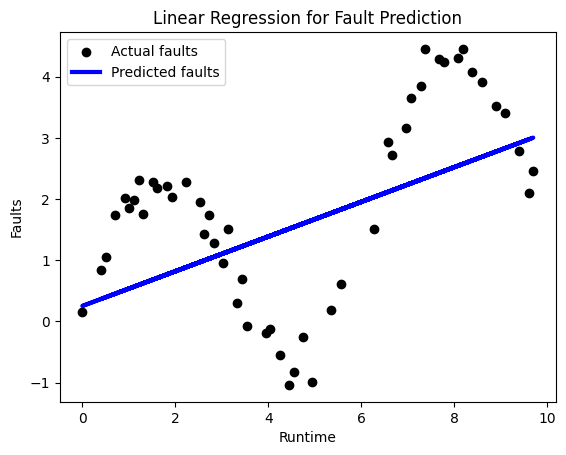

In [9]:
# 繪製觀測值
plt.scatter(X_test, y_test, color='black', label='Actual faults')

# 繪製預測值
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted faults')

# 設定圖標題和軸標籤
plt.title('Linear Regression for Fault Prediction')
plt.xlabel('Runtime')
plt.ylabel('Faults')

# 顯示圖例
plt.legend()

# 顯示圖表
plt.show()

# 非線性回歸

* 函式庫

In [10]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

* 讀取資料 

In [11]:
# 讀取數據
data = pd.read_csv(r"C:\Users\AN515\Desktop\清\2\class\1.csv")

# 分割特徵和目標變量
X = data[['X']]  # 特徵矩陣
y = data['Y']     # 目標變量

# 分割數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


* 建立模型

In [19]:
# 分割數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建一個多項式特徵生成器
degree = 10
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
#先使用 PolynomialFeatures 擴展特徵
# 再套用 LinearRegression 模型做訓練

# 擬合模型
polyreg.fit(X_train, y_train)

# 預測測試集的結果
y_pred = polyreg.predict(X_test)

In [20]:
# 計算性能指標
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 打印性能指標
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.07358248916525054
R^2 Score: 0.9774210135060881


* 製圖

c:\Users\AN515\.pyenv\pyenv-win\versions\3.8.5\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


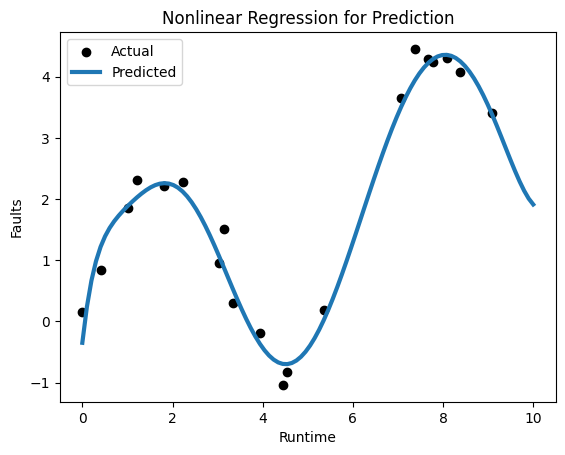

In [21]:
# 繪製觀測值
plt.scatter(X_test, y_test, color='black', label='Actual')

# 產生平滑曲線的輸入
X_fit = np.linspace(X.min(), X.max(), 100)
#使用 linspace() 產生 100 個均勻分布的 X 值，範圍從資料中的最小值到最大值。
# 這些點會被用來畫出一條平滑的預測曲線，讓曲線看起來連續自然。

y_fit = polyreg.predict(X_fit)

# 繪圖
plt.plot(X_fit, y_fit, linewidth=3, label='Predicted')
plt.title('Nonlinear Regression for Prediction')
plt.xlabel('Runtime')
plt.ylabel('Faults')
plt.legend()
plt.show()
